<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/C14_Going_Deeper_The_Mechanics_of_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow computation graphs

Tf performs its computation based on a directed acylic graph (DAG)

In [ ]:
import tensorflow as tf
g= tf.Graph()
with g.as_default():
  a= tf.constant(1, name='a')
  b= tf.constant(2, name='b')
  c= tf.constant(3, name='c')
  z= 2*(a-b)+c
with tf.compat.v1.Session(graph=g) as sess:
  print(sess.run(z))

1


In [ ]:
g= tf.Graph()
with g.as_default():
  a= tf.compat.v1.placeholder(shape= None, dtype= tf.int32, name= 'tf_a')
  b= tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name= 'tf_b')
  c= tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name= 'tf_c')
  z=2*(a-b)+c
with tf.compat.v1.Session(graph=g) as sess:
  feed_dict={a:1, b:2, c:3}
  print(sess.run(z, feed_dict=feed_dict))

1


Tf 2.0 ver

In [ ]:
def compute_z(a,b,c): # <- this is eager execution
  r1= tf.subtract(a,b)
  r2= tf.multiply(2,r1)
  z= tf.add(r2,c)
  return z
# rank0 input
tf.print(compute_z(1,2,3))
# rank1 input
tf.print(compute_z([1],[2],[3]))
# rank2 input
tf.print(compute_z([[1]],[[2]],[[3]]))

1
[1]
[[1]]


Improving compuational performance with function decorators
AutoGraph

In [ ]:
@tf.function #<- tranform from python code to graph code for faster execution
def compute_z(a,b,c):
  r1= tf.subtract(a,b)
  r2= tf.multiply(2,r1)
  z= tf.add(r2,c)
  return z
# rank0 input
tf.print(compute_z(1,2,3))
# rank1 input
tf.print(compute_z([1],[2],[3]))
# rank2 input
tf.print(compute_z([[1]],[[2]],[[3]]))

1
[1]
[[1]]


# TensorFlow Variable objects for storing and updating model parameters

a Variable is a special Tensor object that allow us to update and store the parameters of model

In [ ]:
a= tf.Variable(initial_value=3.14, name='var_a')
a

<tf.Variable 'var_a:0' shape=() dtype=float32, numpy=3.14>

In [ ]:
w= tf.Variable([1,2,3], trainable= False)
# assgin
w.assign([3,1,4], read_value=True)
# assign add
w.assign_add([1,2,3], read_value=True)

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([4, 3, 7], dtype=int32)>

In [ ]:
# create random variable
tf.random.set_seed(1)
init= tf.keras.initializers.GlorotNormal()
tf.print(init(shape=(3,2)))

[[-0.791783273 1.1114037]
 [0.2758421 -0.632478714]
 [1.01057649 0.273120701]]


In [ ]:
class MyModel(tf.Module):
  def __init__(self):
    init= tf.keras.initializers.GlorotNormal()
    self.w1 = tf.Variable(init(shape=(2,3)))
m= MyModel()
m.variables

(<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
 array([[ 1.2180071 ,  0.08606002, -0.83293897],
        [ 0.12410322,  0.9015843 , -0.10481498]], dtype=float32)>,)

In [ ]:
w= tf.Variable(1.0)
b= tf.Variable(0.5)
x= tf.convert_to_tensor([1.4])
y= tf.convert_to_tensor([2.1])
with tf.GradientTape(persistent=True) as tape:
  z=tf.add(tf.multiply(w,x), b)
  loss= tf.reduce_sum(tf.square(y-z))
a= tape.gradient(loss, w)
c =tape.gradient(loss, b)

In [ ]:
optimizer= tf.keras.optimizers.SGD()
optimizer.apply_gradients(zip([a,c],[w,b]))
w,b

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0056>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.504>)

In [ ]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.build(input_shape=(None,4))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for v in model.variables:
  print(v.name, v.shape)

dense/kernel:0 (4, 16)
dense/bias:0 (16,)
dense_1/kernel:0 (16, 32)
dense_1/bias:0 (32,)


In [ ]:
model.variables[0].name

'dense/kernel:0'

In [ ]:
model= tf.keras.Sequential()
model.add(
    tf.keras.layers.Dense(
        units=16,
        activation=tf.keras.activations.relu,
        kernel_initializer=tf.keras.initializers.glorot_uniform(),
        bias_initializer= tf.keras.initializers.Constant(2.0)
    )
)
model.add(
    tf.keras.layers.Dense(
        units=32,
        activation=tf.keras.activations.sigmoid,
        kernel_regularizer= tf.keras.regularizers.l1
    )
)
# specify type of optimizer, loss function for training, which metric
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss= tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.Accuracy(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

# Solving XOR problem with sequential() (first approach)

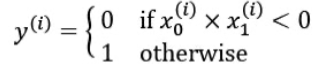

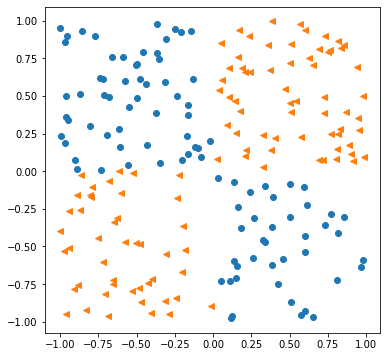

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(1)
np.random.seed(1)
x= np.random.uniform(low=-1, high=1, size=(200,2))
y= np.ones(len(x))
y[x[:,0]*x[:,1]<0]=0
x_train=x[:100,:]
y_train= y[:100]
x_valid= x[100:,:]
y_valid= y[100:]

fig= plt.figure(figsize=(6,6))
plt.plot(x[y==0,0],x[y==0,1], 'o')
plt.plot(x[y==1,0],x[y==1,1], '<')

In [ ]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=(2,), activation='sigmoid'))
model.summary()
# logistic_reg

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss= tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])
hist= model.fit(x_train, y_train, epochs=200, batch_size=2, verbose=0, validation_data=(x_valid, y_valid))

  76/1238 [>.............................] - ETA: 1s

<ipython-input-90-0ad59b2d3f1a>:11: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y= y_valid.astype(np.integer), classifier= model)


1238/1238 [==============================] - 2s 2ms/step


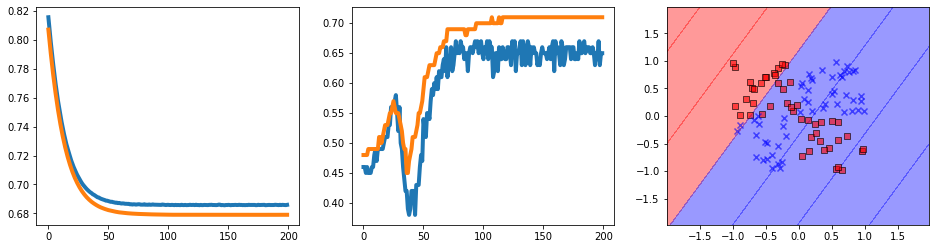

In [ ]:
from run import plot_decision_regions
history= hist.history
fig= plt.figure(figsize=(16,4))
ax= fig.add_subplot(1,3,1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
ax= fig.add_subplot(1,3,2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
ax= fig.add_subplot(1,3,3)
plot_decision_regions(X=x_valid, y= y_valid.astype(np.integer), classifier= model)

As you can see, logistic reg can not solve XOR problem

In order to derive a nonlinear decision boundary, we can add one or more hidden layers connected vie nonlinear activation

In [ ]:
tf.random.set_seed(1)
model= tf.keras.Sequential()
model.add(
    tf.keras.layers.Dense(units=4, input_shape=(2,), activation='relu')
)
model.add(
    tf.keras.layers.Dense(units=4, activation='relu')
)
model.add(
    tf.keras.layers.Dense(units=4, activation='relu')
)
model.add(
    tf.keras.layers.Dense(units=1, activation='sigmoid')
)
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 4)                 12        
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 4)                 20        
                                                                 
 dense_32 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])
hist=model.fit(x=x_train,y=y_train, validation_data=(x_valid,y_valid), epochs=200, batch_size=2, verbose=0)

  40/1238 [..............................] - ETA: 1s  

<ipython-input-93-0ad59b2d3f1a>:11: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y= y_valid.astype(np.integer), classifier= model)


1238/1238 [==============================] - 2s 1ms/step


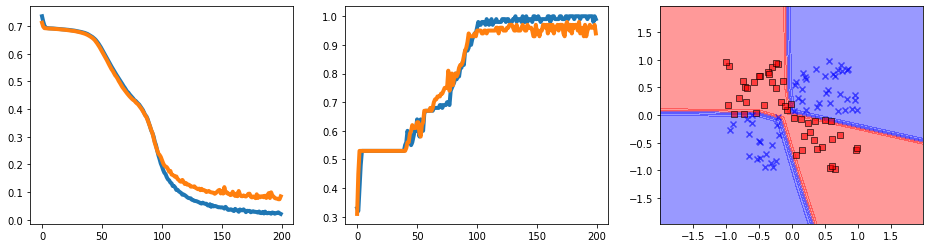

In [ ]:
from run import plot_decision_regions
history= hist.history
fig= plt.figure(figsize=(16,4))
ax= fig.add_subplot(1,3,1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
ax= fig.add_subplot(1,3,2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
ax= fig.add_subplot(1,3,3)
plot_decision_regions(X=x_valid, y= y_valid.astype(np.integer), classifier= model)

# Making model building more flexible with Keras's functional API (second approach)


In the previous section, we use keras.Sequential to create model, this is a common way. However, it doesn't allow us to create more complex model that have multiple input,output or intermediate braches.

In [ ]:
tf.random.set_seed(1)
# input layer
inputs= tf.keras.Input(shape=(2,))
# hidden layer
h1= tf.keras.layers.Dense(units=4, activation='relu')(inputs)
h2= tf.keras.layers.Dense(units=4, activation='relu')(h1)
h3= tf.keras.layers.Dense(units=4, activation='relu')(h2)
# output
outputs= tf.keras.layers.Dense(units=1, activation='sigmoid')(h3)
# construct model
model= tf.keras.Model(inputs= inputs,outputs= outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_37 (Dense)            (None, 4)                 12        
                                                                 
 dense_38 (Dense)            (None, 4)                 20        
                                                                 
 dense_39 (Dense)            (None, 4)                 20        
                                                                 
 dense_40 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(), metrics= [tf.keras.metrics.BinaryAccuracy()], loss=tf.keras.losses.BinaryCrossentropy())
hist=model.fit(x=x_train, y=y_train, validation_data=(x_valid, y_valid), epochs=200, verbose=0,batch_size=2)

  44/1238 [>.............................] - ETA: 1s  

<ipython-input-110-0ad59b2d3f1a>:11: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y= y_valid.astype(np.integer), classifier= model)


1238/1238 [==============================] - 2s 1ms/step


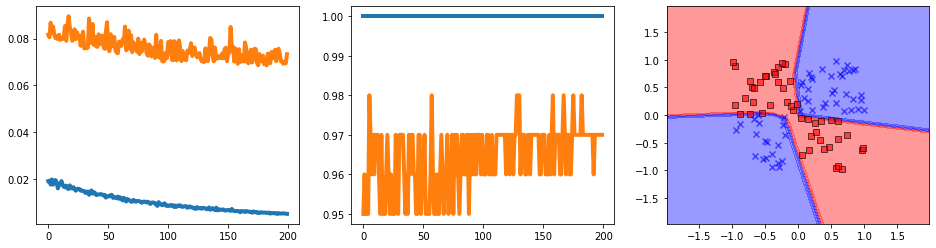

In [ ]:
from run import plot_decision_regions
history= hist.history
fig= plt.figure(figsize=(16,4))
ax= fig.add_subplot(1,3,1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
ax= fig.add_subplot(1,3,2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
ax= fig.add_subplot(1,3,3)
plot_decision_regions(X=x_valid, y= y_valid.astype(np.integer), classifier= model)

# Implementing models based on Keras' Model class (third approach)

In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel,self).__init__()
    self.hidden1=tf.keras.layers.Dense(units=4, activation='relu')
    self.hidden2=tf.keras.layers.Dense(units=4, activation='relu')
    self.hidden3=tf.keras.layers.Dense(units=4, activation='relu')
    self.output_layer=tf.keras.layers.Dense(units=1, activation='sigmoid')
  def call(self, inputs):
    h= self.hidden1(inputs)
    h= self.hidden2(h)
    h= self.hidden3(h)
    return self.output_layer(h)
tf.random.set_seed(1)
model= MyModel()
model.build(input_shape=(None,2))
print(model.summary())
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), metrics=tf.keras.metrics.BinaryAccuracy(), optimizer=tf.keras.optimizers.SGD())
hist=model.fit(x=x_train,y=y_train, validation_data=(x_valid,y_valid), batch_size=2, epochs=200, verbose=0)






Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            multiple                  12        
                                                                 
 dense_46 (Dense)            multiple                  20        
                                                                 
 dense_47 (Dense)            multiple                  20        
                                                                 
 dense_48 (Dense)            multiple                  5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
None


  43/1238 [>.............................] - ETA: 1s  

<ipython-input-114-0ad59b2d3f1a>:11: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y= y_valid.astype(np.integer), classifier= model)


1238/1238 [==============================] - 2s 1ms/step


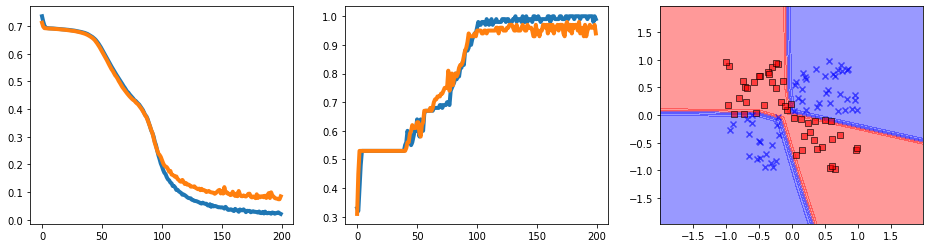

In [ ]:
from run import plot_decision_regions
history= hist.history
fig= plt.figure(figsize=(16,4))
ax= fig.add_subplot(1,3,1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
ax= fig.add_subplot(1,3,2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
ax= fig.add_subplot(1,3,3)
plot_decision_regions(X=x_valid, y= y_valid.astype(np.integer), classifier= model)

# Writing custom Keras layers


In [ ]:
from tensorflow._api.v2.compat.v1 import ConfigProto
class NoisyLinear(tf.keras.layers.Layer):
  def __init__(self, output_dims, noise_stddev=0.1, **kwargs):
    self.output_dims=output_dims
    self.noise_std=noise_stddev
    super(NoisyLinear,self).__init__()

  def build(self, input_shape):
    self.w=self.add_weight(name='weights', shape=(input_shape[1],self.output_dims),initializer='random_normal',trainable=True)
    self.b=self.add_weight(shape=(self.output_dims,), initializer='zeros', trainable=True)
  def call(self, inputs, training=False):
    if training:
      batch=tf.shape(inputs)[0]
      dims=tf.shape(inputs)[1]
      noise=tf.random.normal(shape=(batch,dims), mean=0.0, stddev=self.noise_std)
      noisy_input= tf.add(inputs, noise)
    else:
      noisy_input=inputs
    z=tf.matmul(noisy_input,self.w)+self.b
    return tf.keras.activations.relu(z)
  def get_config(self): # use for save model
    config= super(NoisyLinear,self).get_config()
    config.update({'output_dim': self.output_dim, 'noise_stddev': self.noise_std})
    return config


In [ ]:
### TEST
tf.random.set_seed(1)
x=tf.zeros(shape=(3,4))
noisy_layer= NoisyLinear(4)
noisy_layer.build(input_shape=(None,4))
noisy_layer.call(x, training=True)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.00229101, 0.00643153, 0.00171313, 0.00696694],
       [0.00301648, 0.01239956, 0.0025956 , 0.        ],
       [0.01133829, 0.        , 0.        , 0.        ]], dtype=float32)>

In [ ]:
tf.random.set_seed(1)
model= tf.keras.Sequential([
    NoisyLinear(4,noise_stddev=0.1),
    tf.keras.layers.Dense(units=4,activation='relu'),
    tf.keras.layers.Dense(units=4,activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.build(input_shape=(None,2))
model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 noisy_linear_5 (NoisyLinear  (None, 4)                12        
 )                                                               
                                                                 
 dense_52 (Dense)            (None, 4)                 20        
                                                                 
 dense_53 (Dense)            (None, 4)                 20        
                                                                 
 dense_54 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=tf.keras.metrics.BinaryAccuracy(),optimizer=tf.keras.optimizers.SGD())

hist=model.fit(x=x_train, y=y_train, validation_data=(x_valid,y_valid),epochs=200, verbose=0, batch_size=2)

  36/1238 [..............................] - ETA: 1s  

<ipython-input-129-0ad59b2d3f1a>:11: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y= y_valid.astype(np.integer), classifier= model)


1238/1238 [==============================] - 2s 2ms/step


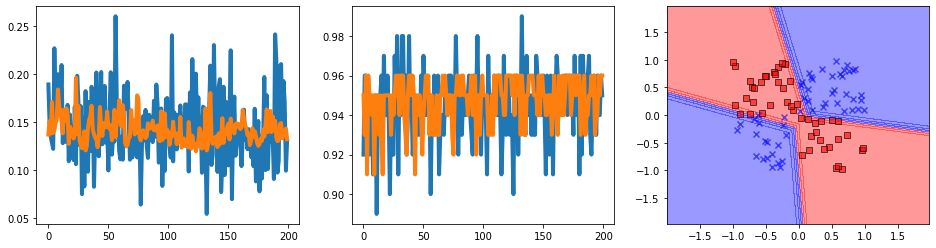

In [ ]:
from run import plot_decision_regions
history= hist.history
fig= plt.figure(figsize=(16,4))
ax= fig.add_subplot(1,3,1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
ax= fig.add_subplot(1,3,2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
ax= fig.add_subplot(1,3,3)
plot_decision_regions(X=x_valid, y= y_valid.astype(np.integer), classifier= model)

# Tensorflow Estimators

Is a high-level tensorflow API, which escapsulate the underlying steps in ml tasks, such as training, prediction and evaluation

Working with feature columns
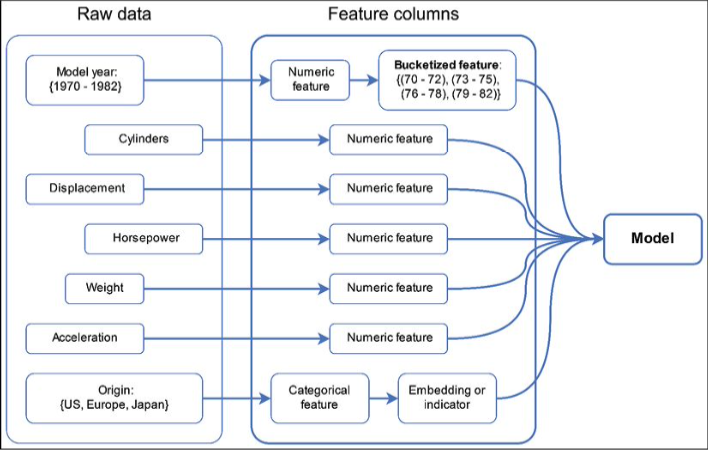

Tf estimators are designed to handle all these types of features

Model year: ordinal feature

Origin: categorical feature

Remain: numeric feature

In [59]:
import pandas as pd
import tensorflow as tf
dataset_path = tf.keras.utils.get_file("auto-mpg.data", 
                                       ("http://archive.ics.uci.edu/ml/machine-learning-databases"
                                        "/auto-mpg/auto-mpg.data"))
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
                'Weight', 'Acceleration', 'ModelYear', 'Origin']
df=pd.read_csv(dataset_path,names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
df=df.dropna()
df=df.reset_index(drop=True)

30286/30286 [==============================] - 0s 2us/step


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   ModelYear     392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 24.6 KB


In [62]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.8)
train_stats = df_train.describe().transpose()

numeric_column_names = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']

df_train_norm, df_test_norm = df_train.copy(), df_test.copy()

for col_name in numeric_column_names:
    mean = train_stats.loc[col_name, 'mean']
    std  = train_stats.loc[col_name, 'std']
    df_train_norm.loc[:, col_name] = (df_train_norm.loc[:, col_name] - mean)/std
    df_test_norm.loc[:, col_name] = (df_test_norm.loc[:, col_name] - mean)/std
df_train_norm.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
299,34.2,-0.836182,-0.837172,-0.890427,-0.906475,-0.902880,79,1
283,17.0,1.532370,1.115943,0.736090,1.084095,-0.094503,79,1
211,13.0,1.532370,1.555393,1.142719,1.345054,-1.343814,76,1
176,23.0,-0.836182,-0.690688,-0.402472,0.012343,0.493409,75,2
199,18.5,0.348094,0.578836,0.193918,0.847412,0.199453,76,1


In [63]:
df_train_norm['Origin'].unique()

array([2, 1, 3])

In [191]:
df_train_norm.loc[270]

MPG             23.800000
Cylinders       -0.823471
Displacement    -0.377643
Horsepower      -0.488511
Weight          -0.116444
Acceleration     0.736448
ModelYear       78.000000
Origin           1.000000
Name: 270, dtype: float64

In [154]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df_train, df_test= train_test_split(df, train_size=0.8)
df_train_norm, df_test_norm= df_train.copy(), df_test.copy()
numeric_col=['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']
sc=StandardScaler()
df_train_norm[numeric_col]=sc.fit_transform(df_train_norm[numeric_col])
df_train_norm.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
98,18.0,0.282909,0.338708,-0.127187,-0.048798,0.172805,73,1
270,23.8,-0.889947,-0.428046,-0.516968,-0.156317,0.733666,78,1
3,16.0,1.455766,1.020267,1.172081,0.534196,-1.229347,70,1
8,14.0,1.455766,2.449647,3.120983,1.719299,-1.930423,70,1
39,14.0,1.455766,1.465173,1.250037,1.395546,-0.703540,71,1


We will transform these continuous features into the feature column data strcuture that tf estomator can work with

In [179]:
numeric_feature=[]
for col_name in numeric_col:
  numeric_feature.append(tf.feature_column.numeric_column(key=col_name))
numeric_feature

[NumericColumn(key='Cylinders', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Displacement', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Horsepower', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Weight', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Acceleration', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

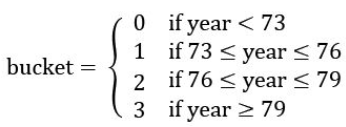

In [180]:
### Group model year into bucket to simplify learning task
feature_year= tf.feature_column.numeric_column(key='ModelYear')
bucketized_feature=[]
bucketized_feature.append(tf.feature_column.bucketized_column(source_column=feature_year,boundaries=[73,76,79]))
bucketized_feature

[BucketizedColumn(source_column=NumericColumn(key='ModelYear', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(73, 76, 79))]

In [182]:
feature_origin= tf.feature_column.categorical_column_with_vocabulary_list(key='Origin',vocabulary_list=[1,2,3])
# convert into dense column. through embedding_column or indicator_column
# when number of categories is large, use embeding column with fewer dimension
categorical_indicator_feature=[]
categorical_indicator_feature.append(tf.feature_column.indicator_column(feature_origin))
categorical_indicator_feature

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Origin', vocabulary_list=(1, 2, 3), dtype=tf.int64, default_value=-1, num_oov_buckets=0))]

ML with pre-made Estimator

Using pre-made Estimators:
1. Define an input function for data loading
2. Convert the dataset into feature columns
3. Instaniate an Estimator(use a pre-maed Estimator or create new one)
4. Use Estimator methods


In [183]:
def train_input_fn(df_train, batch_size=8):
  df=df_train.copy()
  train_x, train_y=df,df.pop('MPG')
  dataset= tf.data.Dataset.from_tensor_slices((dict(train_x),train_y))
  return dataset.shuffle(1000).repeat().batch(batch_size)


In [184]:
def eval_input_fn(df_test,batch_size=8):
  df=df_test.copy()
  test_x, test_y= df,df.pop('MPG')
  dataset= tf.data.Dataset.from_tensor_slices((dict(test_x), test_y))
  return dataset.batch(batch_size)


In [185]:
## step2
all_feature_columns=(numeric_feature+bucketized_feature+categorical_indicator_feature)
regressor = tf.estimator.DNNRegressor(
    feature_columns=all_feature_columns,
    hidden_units=[32, 10],
    model_dir='models/autompg-dnnregressor/')

EPOCHS = 1000
BATCH_SIZE = 8
total_steps = EPOCHS * int(np.ceil(len(df_train) / BATCH_SIZE))
print('Training Steps:', total_steps)

regressor.train(
    input_fn=lambda:train_input_fn(df_train_norm, batch_size=BATCH_SIZE),
    steps=total_steps)


Training Steps: 40000


Caling .train() will automatically save the check points during training, we can then reload the last check point


In [186]:
reloaded_regressor= tf.estimator.DNNRegressor(feature_columns=all_feature_columns, hidden_units=[32,10], warm_start_from='models/autompg-dnnregressor/',model_dir='models/autompg-dnnregressor/')

In [187]:
eval_results= reloaded_regressor.evaluate(input_fn=lambda: eval_input_fn(df_test_norm,batch_size=8))

In [188]:
eval_results

{'average_loss': 7.219039,
 'label/mean': 22.192404,
 'loss': 7.24169,
 'prediction/mean': 22.404133,
 'global_step': 120000}

In [189]:
pred_res = regressor.predict(input_fn=lambda: eval_input_fn(df_test_norm, batch_size=8))

print(next(iter(pred_res)))

{'predictions': array([17.972433], dtype=float32)}


# Estimator with mnist

In [30]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
buffer_size=10000
epochs=20
batch_size=64
steps_per_epcoh=np.ceil(60000/batch_size)
# when using .repeat(), we have to identify step_per_epoch: the number of iteration in each epoch

In [31]:

def preprocess(item):
    image = item['image']
    label = item['label']
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.reshape(image, (-1,))
    return {'image-pixels':image}, label[..., tf.newaxis]

In [32]:
# step1: define two input function
def train_input_fn():
  datasets= tfds.load(name='mnist')
  mnist_train= datasets['train']
  dataset=mnist_train.map(preprocess)
  dataset=dataset.shuffle(buffer_size)
  dataset=dataset.batch(batch_size)
  return dataset.repeat()

In [33]:
def eval_input_fn():
  datasets= tfds.load(name='mnist')
  mnist_train= datasets['test']
  dataset=mnist_train.map(preprocess).batch(batch_size)
  return dataset

In [34]:
d

<MapDataset element_spec=({'image-pixels': TensorSpec(shape=(784,), dtype=tf.float32, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [35]:
# step2: Define feature columns
image_feature_col=tf.feature_column.numeric_column(key='image-pixels', shape=(28*28))


In [36]:
# step3: Create new Estimator
dnn_classifier=tf.estimator.DNNClassifier(feature_columns=[image_feature_col], hidden_units=[32,10], n_classes=10, model_dir='models/mnist-dnn')

In [ ]:
#step4: use Estimator for train, eval, prediction
dnn_classifier.train(input_fn=train_input_fn, steps= steps_per_epcoh * 20)
eval_input= dnn_classifier.evaluate(input_fn=eval_input_fn)
eval_input

In [38]:
eval_input

{'accuracy': 0.8911,
 'average_loss': 0.40685934,
 'loss': 0.40697458,
 'global_step': 18760}

# Create a custom Estimator from an existing Keras model
(Convert from model to estimator)

In [48]:
tf.random.set_seed(1)
np.random.seed(1)
x= np.random.uniform(low=-1, high=1, size=(200,2))
y= np.ones(len(x))
y[x[:,0]*x[:,1] <0]=0
x_train= x[:100,:]
y_train= y[:100]
x_valid= x[100:,:]
y_valid= y[100:]

In [49]:
# build model
model= tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), name='input-feature'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [51]:
# step1: define two input function, step1, step2 must match with what we defined in the input layer of our model
def train_input_fn(x_train,y_train, batch_size=8):
  data_set= tf.data.Dataset.from_tensor_slices(({'input-feature':x_train},y_train.reshape(-1,1)))# to transform dim y from (100,) to (100,1)
  return data_set.shuffle(100).repeat().batch(batch_size)
def eval_input_fn(x_valid,batch_size,y_valid=None):
  if y_valid is None:
    data_set= tf.data.Dataset.from_tensor_slices({'input-feature':x_valid})
  else:
    data_set= tf.data.Dataset.from_tensor_slices(({'input-feature':x_valid},y_valid.reshape(-1,1)))
  return data_set.batch(batch_size)
  
feature_col= tf.feature_column.numeric_column(key='input-feature', shape=(2,))

In [52]:
# step3
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer= tf.keras.optimizers.SGD(), metrics=[tf.keras.metrics.BinaryAccuracy()])
my_estimator= tf.keras.estimator.model_to_estimator(keras_model= model, model_dir='model/estimator-for-XOR')


In [54]:
# step4
epochs=200
batch_size=2
steps_per_epoch = np.ceil(len(x_train) / batch_size)
my_estimator.train(input_fn=lambda:train_input_fn(x_train,y_train,batch_size), steps=epochs * steps_per_epoch)
my_estimator.evaluate(input_fn=lambda:eval_input_fn(x_valid=x_valid,y_valid=y_valid,batch_size=batch_size))


/usr/local/lib/python3.8/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '
/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


{'binary_accuracy': 0.97, 'loss': 0.08004084, 'global_step': 11200}

In [55]:
steps_per_epoch = np.ceil(len(x_train) / batch_size)